---

# Machine Learning practico con la ayuda de Python
# Capitulo 9: Regresion

## Aldo Humberto Romero 

### BUAP, Marzo, 2022
---

In [1]:
# commands prefaced by a % in Jupyter are called "magic"
# these "magic" commands allow us to do special things only related to jupyter

# %matplotlib inline - allows one to display charts from the matplotlib library in a notebook
# %load_ext autoreload - automatically reloads imported modules if they change
# %autoreload 2 - automatically reloads imported modules if they change
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext watermark
%watermark

Last updated: 2022-04-05T16:54:58.863912-04:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 8.0.1

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 21.3.0
Machine     : arm64
Processor   : arm
CPU cores   : 10
Architecture: 64bit



In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

In [4]:
%watermark -iv

matplotlib: 3.5.1
numpy     : 1.21.5
sklearn   : 1.0.2



# De nuevo, volvamos al mapa?

<img src="fig/ml_map.png" width="700" height="200" title="Precision vs Recall" alt="Precision vs Recall"></a>

# Analisis de Regresion

En el modelamiento estatistico, **analisis de regresion** es un conjunto de procesos estadisticos para estimar la relasion entre las variables. Este incluye muchas tecnicas para modelamiento y analisis de diversas variables, cuando el foco es en la relacion entre la variable dependiente y una o mas variables independiente (los vaticinadores). Mas especificamente, el analisis de regresion nos ayda a entender como valor de la variable dependiente cambia cuando las variables dependientes cambian, mientras que las otras variables independientes permanecen fijas.

De una manera mas precisa, la regresion puede referirse especificamente a la estimacion de una respuesta continua, $f(x)$. A diferencia de las variables de respuesta discreta en el caso de clasificacion, esta son continuas.

# Regresion lineal usando la ecuacion de normalizacion, $L_2$.  

`LinearRegression` fitea un modelo lineal con coeficientes $w = (w_1, \cdots, w_p)$ que minimizan la suma residual de los cuadrados entre los resultados observados y los predichos dentro de una approximacion lineal. Matematicamente esto se escribe de la forma:

\begin{equation}
\min_{w} || X w - y||_2^2
\end{equation}


In [5]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

(0.0, 2.0, 0.0, 15.0)

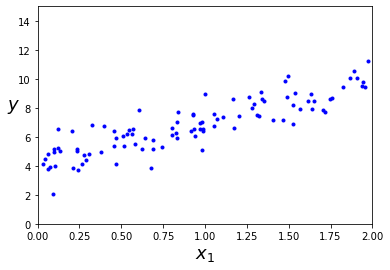

In [6]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

In [7]:
# Antes de ver esta parte, dejenme introducir una funcion nueva de numpy
#np.c_[a,b]
#Translates slice objects to concatenation along the second axis.
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [8]:
#otra funcion viene del subpaquete np.linalg, la paqueteria de algebra lineal de Python
##linalg.inv
# de este vamos a usar el inv que calcula el inverso de una matrix.
# El manual dice:  
# 
#  given a matrix a, return the matrix ainv satisfying dot(a, ainv) = dot(ainv, a) = eye(a.shape[0]).

a=np.array([[1,2,3],[3,1,2],[2,3,1]])
print(a)
ainv=np.linalg.inv(a)
print(np.dot(a, ainv))
np.allclose(np.dot(a, ainv), np.eye(3))

[[1 2 3]
 [3 1 2]
 [2 3 1]]
[[1.00000000e+00 6.24500451e-17 5.55111512e-17]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.31838984e-16 1.00000000e+00]]


True

In [9]:
X_b = np.c_[np.ones((100, 1)), X]  # concat x0 = 1 to each instance
print(X_b.shape)
# entonces el problema de regresion lo podemos escribir de otra manera

# Y = X A + E
# donde E es el vector de "errores"


(100, 2)


Entonces lo que nosotros quisieramos encontrar es

$$
\hat{y} = m X + b
$$

que minimiza $(\hat{y}_1-y_1)^2+(\hat{y}_2-y_2)^2+\cdots = e_1+e_2+\cdots$. Por lo tanto, para cada uno de los puntos $y_1,y_2,\cdots$ podemos escribir

$$
y_1 = m x_1 + b + e_1 \\
y_2 = m x_2 + b + e_2 \\
\vdots
$$

este sistema de ecuaciones lo podemos escribir en forma de matrices, si definimos los vectores

$$
    \mathcal{y} = \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           \vdots \\
           y_{m}
         \end{bmatrix} \;\;\;
    \mathcal{X} = \begin{bmatrix}
           1 & x_{1} \\
           1 & x_{2} \\
           \vdots \\
           1 & x_{m}
         \end{bmatrix} \;\;\;
    \mathcal{A} = \begin{bmatrix}
           b \\
           m 
         \end{bmatrix} \;\;\;
    \mathcal{E} = \begin{bmatrix}
           e_{1} \\
           e_{2} \\
           \vdots \\
           e_{m}
         \end{bmatrix} \;\;\;
$$

Por lo tanto el anterior conjunto de ecuaciones se puede escribir como $ \mathcal{y} = \mathcal{X} \mathcal{A} +\mathcal{E}$, por lo que de esta manera solo tenemos que encontrar el valor de la matrix $\mathcal{A}$. Ahora hacemos magia, que la pueden encontrar [aqui](https://www.youtube.com/watch?v=Z0wELiinNVQ), donde se demuestra que $ \mathcal{A}  = (\mathcal{X}^T \mathcal{X})^{-1} \mathcal{X}^T \mathcal{y}$.

In [10]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_best

array([[4.22137564],
       [2.79537235]])

In [12]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # concat x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.22137564],
       [9.81212035]])

(0.0, 2.0, 0.0, 15.0)

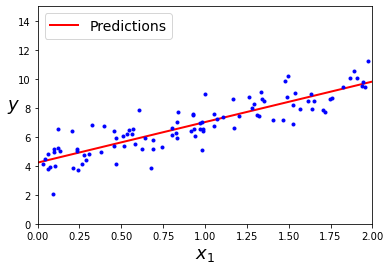

In [13]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])

In [15]:
# Y aqui viene la maquina de sklearn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.22137564]), array([[2.79537235]]))

In [16]:
lin_reg.predict(X_new)

array([[4.22137564],
       [9.81212035]])

La clase `LinearRegression` esta basada en la funcion  `scipy.linalg.lstsq()` que tambien podemos llamar directamente desde scipy:

In [17]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.22137564],
       [2.79537235]])

Esta funcion calcula $\mathbf{X}^+\mathbf{y}$, donde $\mathbf{X}^{+}$ es la *pseudo-inversa* de $\mathbf{X}$ (para los que les gustan las cosas claras, esta se llama la inversa de Moore-Penrose). Se puede usar `np.linalg.pinv()` para calcular la pseudo inversa directamente:

np.linalg.pinv(X_b).dot(y)

# Regresion lineal usando descenso de gradiente por lotes (batches) 


Existe una funcion "exacta" que calcular el valor de las constantes $\theta$ de tal manera que se minimiza la funcion de costo.

\begin{equation}
|| X \theta - y||_2^2
\end{equation}

donde $||.||$ denora la definicion euclidiana de normal de un vector. 
Como vimos antes, la funcion que nos ayuda 

\begin{equation}
  \hat{\boldsymbol\theta} = (\mathbf{X}^\mathsf{T}\mathbf{X})^{-1} \mathbf{X}^\mathsf{T} \mathbf{y},
\end{equation}

EL problema con este tipo de solucion "cerrada" es que no es muy appropiada para grandes dimensiones (miles). La complejidad computacional escala como $O(n^3)$ (con trucos se puede ir mejor, pero no mucho mejor) lo que hace qe este solucion es vuelve mas dificil de usar si el numero de "features" incrementa. Pero de otro lado, el escalamiento con respecto al numero de datos de entrenamiento es lineal.

Con esto en mente, un metodo muy usado es el denominado descenso de gradiente. Este metodo es un algoritmo muy usado para minimizaciones locales. La idea es seguir la direccion de la pendiente mas grande hasta alcanzar el punto minimo (o un punto de infleccion).

La pregunta claro, es como evaluar el gradiente para hacer un cambio local en la direccion.


Por ejemplo

<img src="fig/Descend.jpeg" width="700" height="200" title="descenso de grandiente" alt="descenso de gradiente"></a>

Figure tomada de este [link](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931).

### Caso 1D

Tomemos el caso de 1D que es mas facil. Matematicamente lo que estamos haciendo es

$$
\begin{align}
\mathcal{L} = \frac{1}{N} \sum_i (y_i - \hat{y_i})^2 =  \frac{1}{N} \sum_i (y_i - (m x_i + b))^2
\end{align}
$$

Dados unos valore iniciales para $m$ y $b$, y una tasa de aprendizaje que controla el cambio de $m$ y de $b$ en cada iteracion. El gradiente, $\partial \mathcal{L}/\partial m$ nos daria


$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial m} = -\frac{2}{N} \sum_i x_i (y_i - \hat{y_i}) 
\end{align}
$$

y

$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial b} = -\frac{2}{N} \sum_i  (y_i - \hat{y_i}) 
\end{align}
$$

Por lo tanto el algoritmo nos dice que podemos cambiar el valor de $m$ y $b$ en cada iteracion como


$$
\begin{align}
m & \rightarrow m - \alpha \frac{\partial \mathcal{L}}{\partial m} \\
b & \rightarrow b - \alpha \frac{\partial \mathcal{L}}{\partial b}
\end{align}
$$

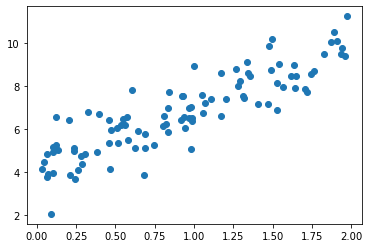

In [23]:
plt.scatter(X, y)
plt.show()

In [32]:
# construyamos el modelo
m = 0
b = 0

eta = 0.0001  # Tasa de aprendizaje
epochs = 10000  # Numero de iteraciones para aplicar el descenso de gradiente

n = float(len(X)) # numero de elementos en X

# Ejecutanco el numero de descensos de gradiente
for i in range(epochs): 
    Y_pred = m*X + b  # EL valor predicho para este caso
    D_m = (-2/n) * sum(X * (y - Y_pred))  # Derivada con respecto a m
    D_c = (-2/n) * sum(y - Y_pred)  # Derivada con respecto a b
    m = m - eta * D_m  # cambia m
    b = b - eta * D_c  # cambia c
    
print (m, b)

[3.3314869] [3.50160621]


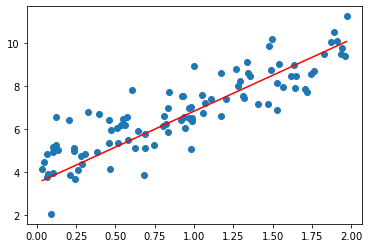

In [33]:
# haciendo las predicciones

Y_pred = m*X + b

plt.scatter(X, y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

Usando entonces la notacion de antes y cambiando la tasa de aprendizaje

In [34]:
eta = 0.1  # tasa de aprendizaje
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # inicializacion aleatoria 

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [35]:
theta

array([[4.22137564],
       [2.79537235]])

In [36]:
X_new_b.dot(theta)

array([[4.22137564],
       [9.81212035]])

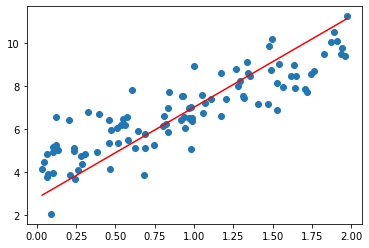

In [37]:
Y_pred = theta[0]*X + theta[1]

plt.scatter(X, y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

## Tasa de aprendizaje

La tasa de aprendizaje es manejado por el hiperparametro $\eta$

In [38]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

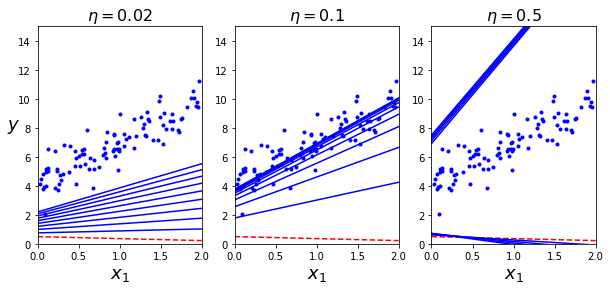

In [39]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

# Descenso de gradiente estocastico (SGD)

En vez de usar todo el conjunto de datos, SGD usa un subconjunto aleatorio en cada iteracion, lo cual hace que el proceso sea mas rapido pero al precio que hay ahora una inestabilidad que las soluciones son mas dispersas.

In [40]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

(0.0, 2.0, 0.0, 15.0)

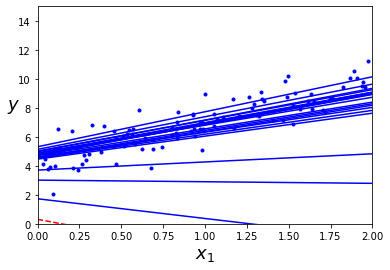

In [42]:
n_epochs = 50
t0, t1 = 5, 50  #  vamos a ir cambiando la tasa de aprendizaje

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    # m es el tamaño de los datos usados para entrenar
    for i in range(m):
        if epoch == 0 and i < 20:                 # cada cierto numero de iteraciones vamos a dibujar como vamos                
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              

In [43]:
theta

array([[4.20707468],
       [2.8527653 ]])

In [44]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [45]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.19737606]), array([2.7776593]))

# Descenso de gradiente de mini lotes

Descenso de gradiente de mini lotes es una variacion del algoritmo de descenso de gradiente que divide el conjunto de datos usados para entrenar en pequeños minilotes que son usados para calcular el error del modelo y para actualizar los coefcientes del modelo.

In [47]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # inicializacion aleatoria

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [48]:
theta

array([[4.20958937],
       [2.78300114]])

In [49]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

(2.5, 4.5, 2.3, 3.9)

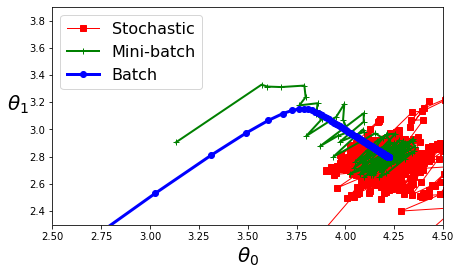

In [50]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

# Regresion polinomial

La regresion polinomial es una truco que usa la misma maquinaria de la regresion linear pero ahora teniendo en cuenta que la funcion que queremos usar no es una linea recta pero es un polinomio. La idea es adicionar mas "features" que son potencias de las "features" originales y entrenar el regresor lineal teniendo en cuenta estas "features" adicionales. 

In [51]:
import numpy.random as rnd

np.random.seed(42)

In [52]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

(-3.0, 3.0, 0.0, 10.0)

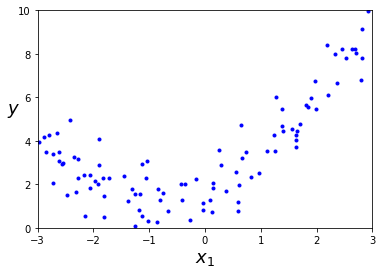

In [53]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

In [54]:
# Del manual de scikit
# Generate a new feature matrix consisting of all polynomial combinations of the features 
# with degree less than or equal to the specified degree. 
# For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial 
# features are [1, a, b, a^2, ab, b^2].

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [55]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [56]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

(-3.0, 3.0, 0.0, 10.0)

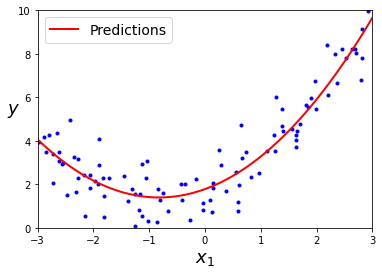

In [57]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

## A que grado de polinomio deberia de ir?

(-3.0, 3.0, 0.0, 10.0)

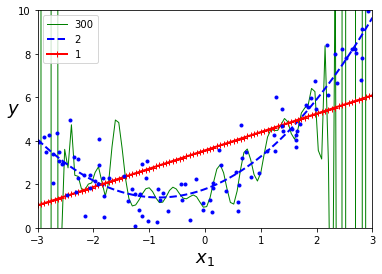

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

# Modelos regularizados

La figura anterior para el caso de un polinomio de orden 300 (o mas), es clarisimo, que nosotros estamos sobreajustando (overfitting),  Esto se ve en que el valor de algunos de los parametros de hacen muy grandes, por lo que podemos ayudar al modelo, controlando el peso de los diferentes grados del polinomio, penalizando el valor que estos puedan tener. Por lo tanto la idea es solo agregar un termino de penalidad a la funcion de perdida que presentamos anteriormente. 


## Regresion de Cresta (Ridge Regression)

Una explicacion sencilla de este tipo de regresion puede ser encontrado en [Ridge Regression](https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Ridge_Regression.pdf). Basicamente, el problema es redefinir la funcion de perdida  a: 


\begin{equation}
\mathcal{L} = || X \theta - y||_2^2 + \gamma || \theta ||_2^2
\end{equation}

donde $\gamma \ge0$  y es llamado el parametro de regularizacion y debe ser escogido por el usuario. En general, el valor optimo de $\gamma$ puede ser obtenido afinandolo o usando metodos de validacion cruzada. 

La validacion cruzada (cross-validation) es una tecnica muy usada para estimar el error de prediccion de un modelo. La idea es dividir los datos (training set) es un numero conocido de particiones (conjuntos de validacion), digamos $K$. Entonces lo que hacemos, es de los $K$, usamos uno de ellos para probar la precision del modelo y usamos los otros $K-1$ para entrenar el modelo. El error del modelo de obtiene al promediar estos valores. Por lo tanto, la idea es usar una seria de valores de $\gamma$ y realizar este experimento de validacion cruzada y escoger el mejor valor.

EN nuestro caso (sin mas detalles) seria algo asi:

\begin{equation}
  \hat{\boldsymbol\theta} = (\mathbf{X}^\mathsf{T}\mathbf{X} + \gamma I_{p+1})^{-1} \mathbf{X}^\mathsf{T} \mathbf{y},
\end{equation}

donde $I_{p+1}$ es la matriz identidad de $(p+1)\times(p+1)$.


In [59]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [60]:

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [61]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

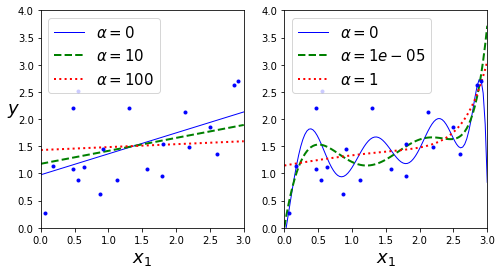

In [62]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

**Nota**: Para evitar problemas en el futuro, fijamos `max_iter=1000` y `tol=1e-3` porque son los valores predefinidos en el caso de Scikit-Learn 0.21.

En scikit-learn, esta regulaization se puede logar con `penalty="l2"` en el regresor. 

In [63]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

## Regresion Lasso

El acronimo “LASSO” se refiere a su significado en ingles *Least Absolute Shrinkage and Selection Operator* y en este caso la funcion de minimizacion toma la forma de
\begin{equation}
|| X \theta - y||_2^2 + \gamma || \theta ||_1
\end{equation}

donde $||.||_1$ es la denominada norma de Manhattan. Comparada com la regresion "Ridge", aqui no hay una formula para los parametros pero todavia puede resolverse usando optimizacion numerica. LASSO tiende a favorecer "soluciones dispersas", donde solo algunos de los parametros son diferentes de cero y el resto son exactamente igual a cero. 

/Users/aldoromero/.local/lib/python3.9/site-packages/scikit_learn-1.0.2-py3.9-macosx-11.0-arm64.egg/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


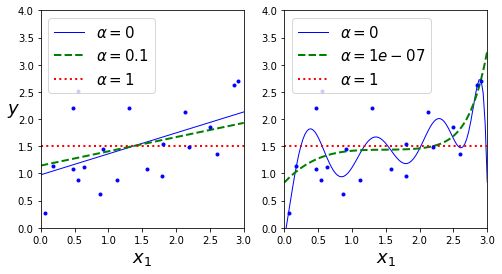

In [64]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

In [65]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## Red elastica (Elastic Net)

Es una mezcla entre Ridge y Lasso, donde ahora la minimizacion es sobre la funcion

\begin{equation}
|| X \theta - y||_2^2 + \frac{1-r}{2} \gamma || \theta ||_1 + r \gamma || \theta ||_2^2
\end{equation}



In [66]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [67]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

## Parada temprana (Early stopping)

La idea es para el entrenamiento tan pronto como el erro de validacion alcance un minimo.

In [68]:
# Del manual
# Clone does a deep copy of the model in an estimator without actually copying attached data. 
# It returns a new estimator with the same parameters that has not been fitted on any data.

from sklearn.base import clone
from sklearn.metrics import mean_squared_error

# Del manual
# Sequentially apply a list of transforms and a final estimator

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])


X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)


sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

Creando la grafica:

Text(0, 0.5, 'RMSE')

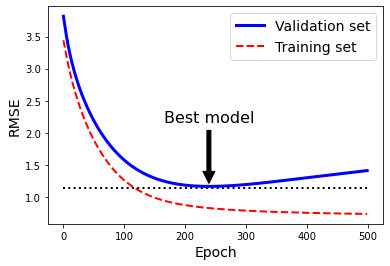

In [69]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

In [70]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

In [71]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

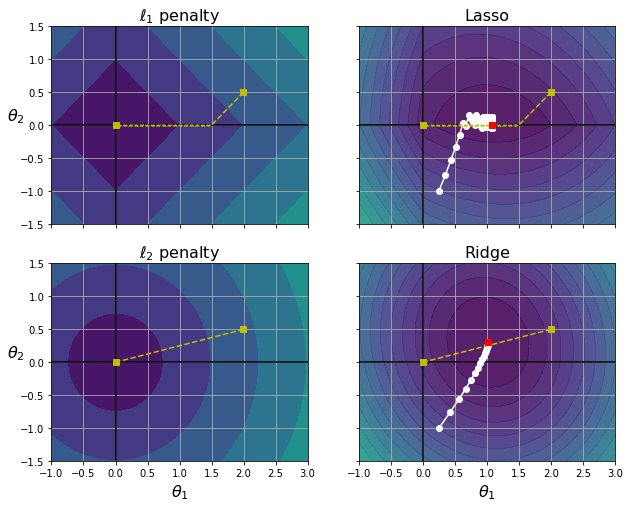

In [72]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)


# Regresion logistica

Aunque su nombre es "regresion" es realmente un clafisicador, como hemos visto antes y que da la probabilidad de dar una idea de a que clase pertenece. 


(-10.0, 10.0, -0.1, 1.1)

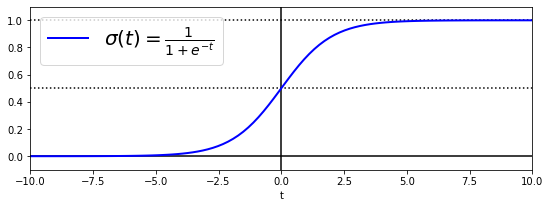

In [73]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])